# Data Roles Salary Box Plot (2.20.3) - Problem

2️⃣ Advanced - Seaborn 🌊

Problem Statement:
Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
Set the x-axis limit to 300,000 and format it as $100k.
Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns 
import matplotlib.pyplot as plt 


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


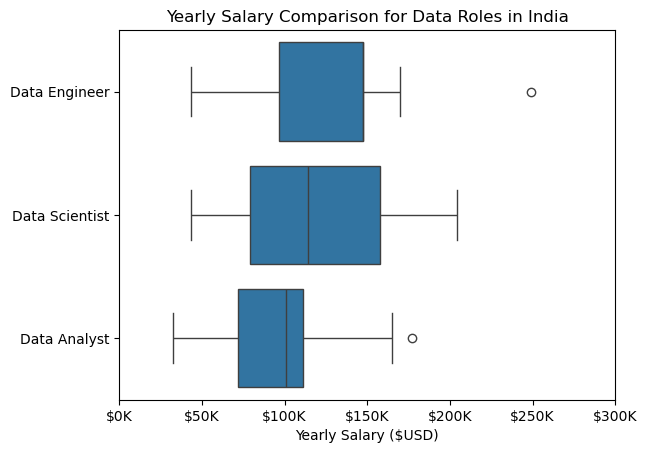

In [5]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Only get data scientist jobs in India
in_jobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

#Drop NaN values from the column for plotting
in_jobs = in_jobs.dropna(subset=['salary_year_avg'])

sns.boxplot(data=in_jobs, x='salary_year_avg', y='job_title_short')
plt.title( 'Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.show()